In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

from sim_utils import *
from simulation import *


/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### dirichlet X mlp

In [2]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 50000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
    }
model_type = "gtm"
gtm_model_args = {
    "n_topics": num_topics,
    "num_epochs": 10,
    "update_prior": True,
    "doc_topic_prior": "dirichlet",
    "decoder_type": "mlp"
    }
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[],"euclid":[]}
for i in range(num_simulations):

    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        doc_args=doc_args
        )
    s.estimate_distributions(
        is_output=True,
        model_args=gtm_model_args
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"]
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            doc_topic_prior=gtm_model_args["doc_topic_prior"],
            decoder_type=gtm_model_args["decoder_type"],
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th work".format(i+1))
    print("  ")

with open("../data/{}/score_dict_{}_{}_{}.pickle".format(model_type,num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]),"wb") as f:
    pickle.dump(score_dict,f)

100%|██████████| 50000/50000 [12:41<00:00, 65.62it/s]


Epoch   1	Iter   10	Loss:2.6896958	Rec Loss:1.9950001	MMD:0.6946957	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:2.4870396	Rec Loss:1.9915020	MMD:0.4955374	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   30	Loss:2.4246097	Rec Loss:1.9679387	MMD:0.4566711	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   40	Loss:2.4063115	Rec Loss:1.9486122	MMD:0.4576994	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   50	Loss:2.2885649	Rec Loss:1.9473910	MMD:0.3411738	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   60	Loss:2.2198915	Rec Loss:1.9867643	MMD:0.2331274	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   70	Loss:2.0577250	Rec Loss:1.9569714	MMD:0.1007535	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   80	Loss:2.0603852	Rec Loss:1.9448192	MMD:0.1155661	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   90	Loss:2.0753281	Rec Loss:1.9548422	MMD:0.1204858	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 50000/50000 [12:10<00:00, 68.45it/s]


Epoch   1	Iter   10	Loss:2.6541011	Rec Loss:1.9444560	MMD:0.7096452	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:2.4932210	Rec Loss:1.9908811	MMD:0.5023400	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   30	Loss:2.4946084	Rec Loss:1.9992093	MMD:0.4953992	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   40	Loss:2.3759389	Rec Loss:1.9256760	MMD:0.4502630	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   50	Loss:2.2838011	Rec Loss:1.9596707	MMD:0.3241303	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   60	Loss:2.1689513	Rec Loss:1.9371840	MMD:0.2317673	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   70	Loss:2.0923853	Rec Loss:1.9522530	MMD:0.1401322	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   80	Loss:2.0018086	Rec Loss:1.9148942	MMD:0.0869145	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   90	Loss:2.0467854	Rec Loss:1.9646920	MMD:0.0820932	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 50000/50000 [11:44<00:00, 70.96it/s]


Epoch   1	Iter   10	Loss:2.7592928	Rec Loss:1.9801825	MMD:0.7791103	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:2.5498886	Rec Loss:2.0102224	MMD:0.5396663	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   30	Loss:2.4839573	Rec Loss:1.9912181	MMD:0.4927393	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   40	Loss:2.3691401	Rec Loss:1.9689372	MMD:0.4002029	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   50	Loss:2.3087974	Rec Loss:1.9705143	MMD:0.3382831	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   60	Loss:2.2179346	Rec Loss:1.9429816	MMD:0.2749531	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   70	Loss:2.0648069	Rec Loss:1.9125534	MMD:0.1522536	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   80	Loss:2.1182067	Rec Loss:1.9625363	MMD:0.1556703	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   90	Loss:2.0782065	Rec Loss:1.9359794	MMD:0.1422272	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 50000/50000 [11:45<00:00, 70.92it/s]


Epoch   1	Iter   10	Loss:2.7859042	Rec Loss:1.9604074	MMD:0.8254969	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:2.4928925	Rec Loss:1.9957440	MMD:0.4971484	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   30	Loss:2.4135053	Rec Loss:1.9578325	MMD:0.4556728	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   40	Loss:2.4515886	Rec Loss:1.9999514	MMD:0.4516372	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   50	Loss:2.3910160	Rec Loss:1.9868039	MMD:0.4042121	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   60	Loss:2.2600517	Rec Loss:1.9820743	MMD:0.2779776	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   70	Loss:2.2144549	Rec Loss:1.9828445	MMD:0.2316105	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   80	Loss:2.1759732	Rec Loss:1.9478524	MMD:0.2281208	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   90	Loss:2.0420604	Rec Loss:1.9361546	MMD:0.1059057	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 50000/50000 [11:45<00:00, 70.91it/s]


Epoch   1	Iter   10	Loss:2.7345963	Rec Loss:1.9652517	MMD:0.7693446	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:2.5215764	Rec Loss:1.9635161	MMD:0.5580602	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   30	Loss:2.4188223	Rec Loss:1.9609673	MMD:0.4578549	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   40	Loss:2.3714993	Rec Loss:1.9420730	MMD:0.4294263	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   50	Loss:2.4106755	Rec Loss:1.9801451	MMD:0.4305305	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   60	Loss:2.1880665	Rec Loss:1.9206994	MMD:0.2673671	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   70	Loss:2.0842440	Rec Loss:1.9778237	MMD:0.1064203	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   80	Loss:2.0820119	Rec Loss:1.9570960	MMD:0.1249160	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   90	Loss:2.1600788	Rec Loss:1.9776394	MMD:0.1824394	Sparsity_Loss:0.0000000	Pred_Loss:0.

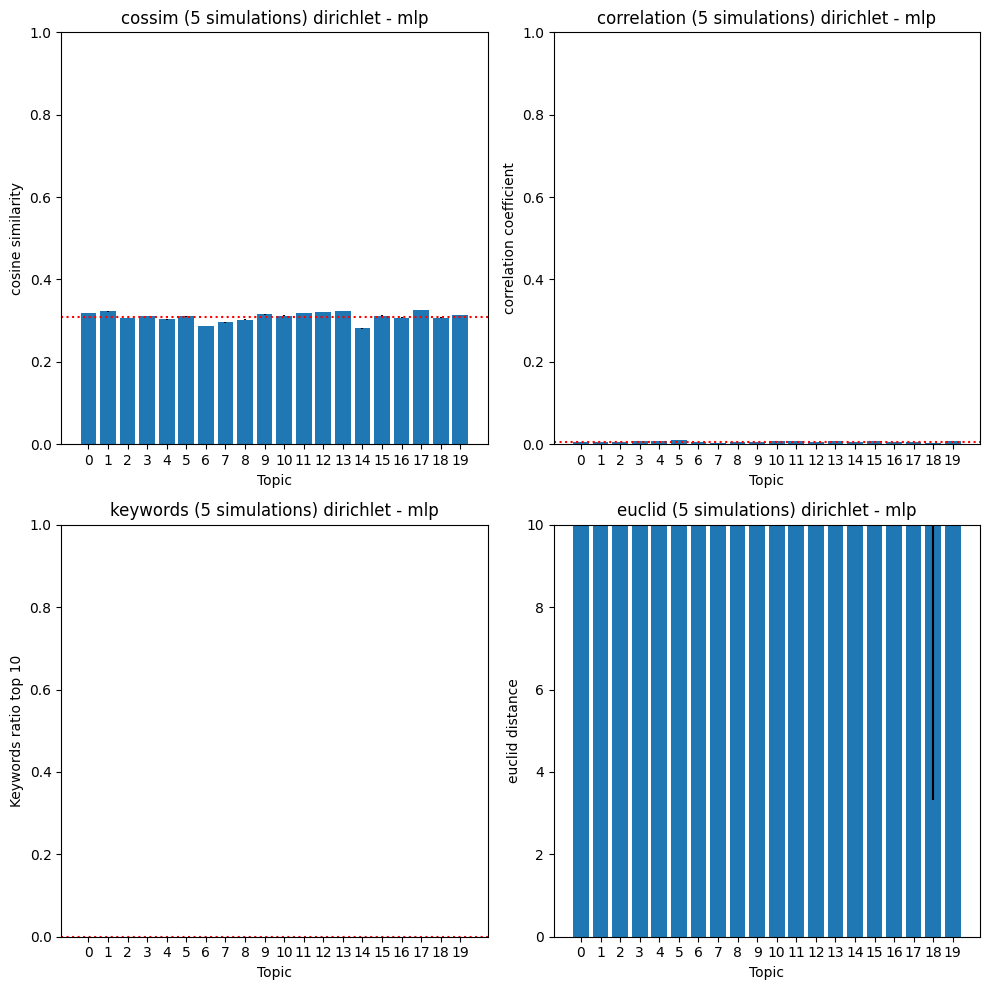

In [4]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()